# Initialize

In [1]:
import random
from torch_geometric.utils import to_networkx
import networkx as nx
from torch_geometric.datasets import Planetoid
import matplotlib.pyplot as plt
import torch_geometric.transforms as T
import torch.nn as nn
from torch_geometric.nn import GCNConv, RGCNConv
import torch.nn.functional as F
import torch
from torch_geometric.data import Data
import json
import numpy as np
plt.style.use('seaborn')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #if you have a GPU with CUDA installed, this may speed up computation

In [2]:
from functions.form_graphs import setup_graphs

# Setup Graphs for Training

In [3]:
def flatten(list_of_list):
    return [item for sublist in list_of_list for item in sublist]

In [4]:
training_set = ['ES2002', 'ES2005', 'ES2006', 'ES2007', 'ES2008', 'ES2009', 'ES2010', 'ES2012', 'ES2013', 'ES2015', 'ES2016', 'IS1000', 'IS1001', 'IS1002', 'IS1003', 'IS1004', 'IS1005', 'IS1006', 'IS1007', 'TS3005', 'TS3008', 'TS3009', 'TS3010', 'TS3011', 'TS3012']
training_set = flatten([[m_id+s_id for s_id in 'abcd'] for m_id in training_set])
training_set.remove('IS1002a')
training_set.remove('IS1005d')
training_set.remove('TS3012c')
graph_train, graph_number_train = setup_graphs(training_set, train = True, illustrate = False)

[0, 0, 1, 2, 0, 2, 0, 3, 0, 3, 0, 4, 4, 4, 4, 5, 5, 0, 0, 0, 2, 0, 2, 0, 0, 6, 0, 8, 8, 7, 3, 6, 6, 3, 0, 0, 2, 2, 0, 8, 4, 3, 7, 3, 0, 2, 2, 7, 6, 8, 0, 0, 0, 0, 2, 3, 0, 2, 0, 0, 3, 3, 0, 8, 5, 3, 2, 9, 3, 2, 8, 2, 5, 0, 2, 3, 0, 7, 6, 6, 2, 0, 0, 1, 6, 0, 2, 3, 0, 3, 0, 4, 4, 4, 8, 3, 2, 4, 2, 2, 4, 0, 7, 6, 4, 8, 7, 6, 2, 1, 0, 0, 0, 0, 0, 2, 8, 6, 1, 0, 8, 3, 0, 8, 3, 4, 0, 0, 1, 3, 7, 2, 2, 0, 1, 0, 3, 7, 6, 4, 6, 1, 0, 8, 1, 4, 0, 2, 5, 8, 3, 2, 3, 4, 8, 0, 6, 0, 4, 8, 3, 7, 6, 4, 4, 3, 2, 3, 8, 0, 4, 3, 2, 2, 3, 3, 3, 3, 3, 10, 4, 7, 6, 7, 6, 11, 2, 2, 0, 3, 3, 3, 0, 3, 4, 1, 8, 2, 3, 1, 5, 2, 2, 3, 2, 6, 2, 0, 2, 7, 2, 3, 3, 2, 0, 6, 1, 5, 3, 3, 0, 8, 0, 0, 3, 0, 6, 3, 3, 2, 6, 9, 8, 3, 6, 0, 2, 3, 2, 3, 0, 2, 3, 1, 7, 6, 7, 6, 2, 11, 0, 2, 8, 3, 0, 3, 0, 0, 3, 0, 3, 7, 6, 6, 0, 2, 2, 0, 0, 6, 0, 11, 2, 6, 4, 2, 4, 0, 3, 2, 5, 8, 8, 2, 8, 0, 3, 4, 2, 5, 0, 0, 0, 0, 5, 3, 0, 6, 2, 11, 0, 11, 3, 3, 0, 3, 3, 4, 0, 4, 0, 6, 4, 6, 3, 2, 2, 2, 3, 3, 2, 8, 3, 8, 7, 6, 3, 11, 3, 5, 5,

# Setup Graphs for Testing

In [5]:
test_set = ['ES2003', 'ES2004', 'ES2011', 'ES2014', 'IS1008', 'IS1009', 'TS3003', 'TS3004', 'TS3006', 'TS3007']
test_set = flatten([[m_id+s_id for s_id in 'abcd'] for m_id in test_set])
graph_test, graph_number_test = setup_graphs(test_set, train = False, illustrate = False)

[0, 0, 4, 1, 1, 3, 2, 0, 0, 6, 2, 4, 1, 4, 4, 7, 6, 8, 7, 6, 4, 7, 6, 4, 7, 6, 8, 3, 7, 6, 0, 2, 2, 0, 2, 1, 2, 2, 8, 2, 5, 2, 2, 1, 2, 2, 2, 0, 2, 0, 0, 9, 6, 4, 4, 2, 6, 2, 1, 13, 2, 0, 2, 0, 0, 0, 8, 0, 2, 0, 0, 3, 3, 3, 0, 6, 6, 4, 1, 7, 6, 6, 0, 8, 4, 4, 2, 4, 2, 3, 0, 3, 9, 4, 3, 2, 0, 3, 0, 6, 3, 6, 6, 6, 2, 2, 8, 8, 4, 2, 2, 1, 1, 1, 9, 10, 2, 2, 2, 5, 9, 9, 0, 5, 2, 1, 8, 3, 2, 10, 6, 0, 2, 2, 4, 2, 2, 0, 8, 0, 0, 2, 0, 3, 7, 8, 0, 8, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 2, 3, 3, 3, 0, 0, 3, 3, 0, 0, 4, 0, 3, 2, 2, 0, 2, 2, 0, 2, 8, 0, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 8, 3, 2, 2, 8, 0, 0, 8, 3, 3, 3, 3, 3, 0, 6, 2, 1, 0, 8, 0, 5, 3, 2, 0, 2, 2, 0, 3, 0, 3, 0, 1, 0, 3, 1, 0, 2, 0, 0, 3, 3, 0, 0, 3, 1, 13, 1, 3, 2, 5, 0, 2, 0, 0, 0, 7, 6, 3, 6, 0, 6, 2, 0, 6, 14, 8, 11, 6, 2, 0, 0, 5, 3, 0, 8, 2, 8, 3, 0, 0, 4, 2, 2, 8, 3, 8, 8, 2, 1, 0, 0, 0, 0, 3, 7, 3, 3, 3, 4, 4, 0, 14, 8, 4, 4, 0, 3, 0, 3, 1, 7, 6, 0, 4, 3, 3, 2, 3, 0, 0, 4, 2, 0, 2, 0, 1, 2, 5, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,

# Split Training Data Into Train, Validation and Test

In [6]:
def train_and_validation_split(graph_number,val_number,test_number=[]):
    train_number = np.array([i for i in range(1,1+max(graph_number))])
    val_number = np.array(val_number)
    test_number = np.array(test_number)
    train_number = np.delete(train_number,np.where(np.in1d(train_number,val_number)))
    train_number = np.delete(train_number,np.where(np.in1d(train_number,test_number)))
    print(train_number,val_number,test_number)
    train_mask = np.in1d(graph_number,train_number)
    val_mask = np.in1d(graph_number,val_number)
    test_mask = np.in1d(graph_number,test_number)
    return train_mask, val_mask, test_mask

train_mask, val_mask, test_mask = train_and_validation_split(graph_number_train,[2,7,10,11,67,20,21,22,23,24,25,26,27],test_number=[30,31,32,33,34,35,36,37])

[ 1  3  4  5  6  8  9 12 13 14 15 16 17 18 19 28 29 38 39 40 41 42 43 44
 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 68 69
 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93
 94 95 96] [ 2  7 10 11 67 20 21 22 23 24 25 26 27] [30 31 32 33 34 35 36 37]


# Train Naive Model

In [7]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(1, 64),
        nn.ReLU(),
        nn.Linear(64, 32),
        nn.ReLU(),
        nn.Linear(32, 2)
        )

    def forward(self, data):
        x = data.x  # only using node features (x)
        output = self.layers(x)
        return output

In [8]:
def train_node_classifier(model, graph, optimizer, criterion, train_mask, val_mask, n_epochs=200):

    train_acc = []
    val_acc = []

    for epoch in range(1, n_epochs + 1):
        model.train()
        optimizer.zero_grad()
        out = model(graph)
        loss = criterion(out[train_mask], graph.y[train_mask])
        loss.backward()
        optimizer.step()

        pred = out.argmax(dim=1)
        acc = eval_node_classifier(model, graph, val_mask)

        val_acc.append(acc)
        train_acc.append(eval_node_classifier(model, graph, train_mask))

        if epoch % 10 == 0:
            print(f'Epoch: {epoch:03d}, Train Loss: {loss:.3f}, Val Acc: {acc:.3f}')

    return model, val_acc, train_acc


def eval_node_classifier(model, graph, mask):

    model.eval()
    pred = model(graph).argmax(dim=1)
    correct = (pred[mask] == graph.y[mask]).sum()
    acc = int(correct) / int(mask.sum())

    return acc
    
mlp = MLP().to(device)
optimizer_mlp = torch.optim.Adam(mlp.parameters(), lr=0.001, weight_decay=5e-4)
criterion = nn.CrossEntropyLoss()
mlp, val_acc, train_acc  = train_node_classifier(mlp, graph_train, optimizer_mlp, criterion, train_mask, val_mask, n_epochs=150)

test_acc = eval_node_classifier(mlp, graph_train, test_mask)
print(f'Test Acc: {test_acc:.3f}')

Epoch: 010, Train Loss: 0.569, Val Acc: 0.802
Epoch: 020, Train Loss: 0.491, Val Acc: 0.802
Epoch: 030, Train Loss: 0.475, Val Acc: 0.802
Epoch: 040, Train Loss: 0.475, Val Acc: 0.802
Epoch: 050, Train Loss: 0.473, Val Acc: 0.802
Epoch: 060, Train Loss: 0.471, Val Acc: 0.802
Epoch: 070, Train Loss: 0.470, Val Acc: 0.802
Epoch: 080, Train Loss: 0.468, Val Acc: 0.802
Epoch: 090, Train Loss: 0.467, Val Acc: 0.802
Epoch: 100, Train Loss: 0.467, Val Acc: 0.802
Epoch: 110, Train Loss: 0.466, Val Acc: 0.802
Epoch: 120, Train Loss: 0.466, Val Acc: 0.802
Epoch: 130, Train Loss: 0.465, Val Acc: 0.802
Epoch: 140, Train Loss: 0.465, Val Acc: 0.802
Epoch: 150, Train Loss: 0.465, Val Acc: 0.802
Test Acc: 0.761


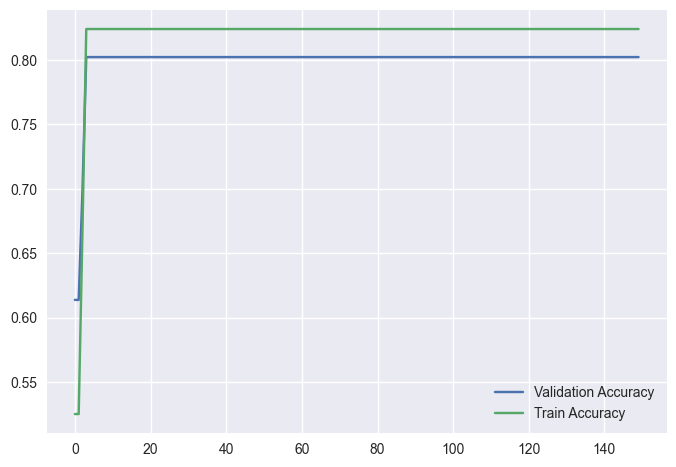

In [9]:
def plot_accuracies(val_acc,train_acc): 
    plt.plot(val_acc,label='Validation Accuracy')
    plt.plot(train_acc,label='Train Accuracy')
    plt.legend()
plot_accuracies(val_acc,train_acc)

In [10]:
class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(1, 8)
        self.conv2 = GCNConv(8, 2)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        output = self.conv2(x, edge_index)

        return output
    
gcn = GCN().to(device)
optimizer_gcn = torch.optim.Adam(gcn.parameters(), lr=0.001, weight_decay=5e-4)
criterion = nn.CrossEntropyLoss()
gcn, val_acc, train_acc = train_node_classifier(gcn, graph_train, optimizer_gcn, criterion, train_mask, val_mask)

test_acc = eval_node_classifier(gcn, graph_train, test_mask)
print(f'Test Acc: {test_acc:.3f}')

Epoch: 010, Train Loss: 0.492, Val Acc: 0.802
Epoch: 020, Train Loss: 0.485, Val Acc: 0.802
Epoch: 030, Train Loss: 0.483, Val Acc: 0.802
Epoch: 040, Train Loss: 0.483, Val Acc: 0.802
Epoch: 050, Train Loss: 0.482, Val Acc: 0.802
Epoch: 060, Train Loss: 0.481, Val Acc: 0.802
Epoch: 070, Train Loss: 0.481, Val Acc: 0.802
Epoch: 080, Train Loss: 0.480, Val Acc: 0.802
Epoch: 090, Train Loss: 0.479, Val Acc: 0.802
Epoch: 100, Train Loss: 0.479, Val Acc: 0.802
Epoch: 110, Train Loss: 0.478, Val Acc: 0.802
Epoch: 120, Train Loss: 0.477, Val Acc: 0.802
Epoch: 130, Train Loss: 0.477, Val Acc: 0.802
Epoch: 140, Train Loss: 0.476, Val Acc: 0.802
Epoch: 150, Train Loss: 0.476, Val Acc: 0.802
Epoch: 160, Train Loss: 0.475, Val Acc: 0.802
Epoch: 170, Train Loss: 0.474, Val Acc: 0.802
Epoch: 180, Train Loss: 0.474, Val Acc: 0.802
Epoch: 190, Train Loss: 0.473, Val Acc: 0.802
Epoch: 200, Train Loss: 0.473, Val Acc: 0.802
Test Acc: 0.761


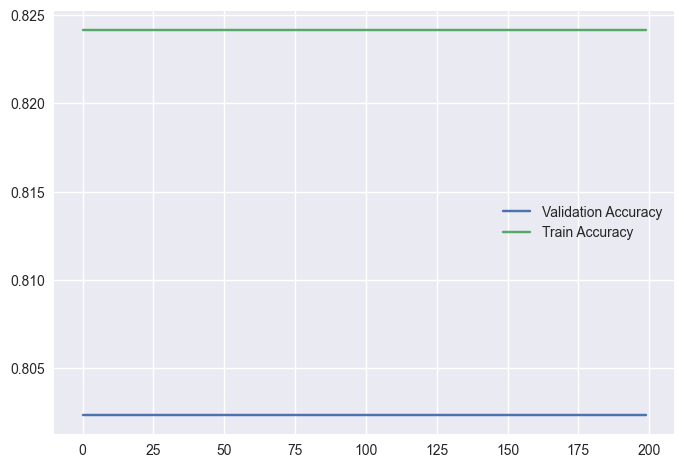

In [11]:
plot_accuracies(val_acc,train_acc)

In [12]:
types = np.array(['Continuation', 'Explanation','Elaboration','Acknowledgement',
                      'Comment','Result','Question-answer_pair','Clarification_question',
                      'Contrast','Background','Narration','Alternation','Q-Elab',
                      'Conditional','Correction','Parallel'])
num_relations = len(types)

In [42]:
class RGCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = RGCNConv(1, 8, num_relations)
        self.conv2 = RGCNConv(8, 2, num_relations)

    def forward(self, data):
        x = data.x
        edge_index = data.edge_index
        edge_type = data.edge_type

        x = F.relu(self.conv1(x, edge_index, edge_type))
        x = self.conv2(x, edge_index, edge_type)
        #return F.log_softmax(x, dim=1)
        return F.tanh(x)
    
rgcn = RGCN().to(device)
optimizer_gcn = torch.optim.Adam(rgcn.parameters(), lr=1e-03)
criterion = nn.CrossEntropyLoss()
rgcn, val_acc, train_acc = train_node_classifier(rgcn, graph_train, optimizer_gcn, criterion, train_mask, val_mask)

test_acc = eval_node_classifier(rgcn, graph_train, test_mask)
print(f'Test Acc: {test_acc:.3f}')

Epoch: 010, Train Loss: 1.104, Val Acc: 0.316
Epoch: 020, Train Loss: 1.019, Val Acc: 0.352
Epoch: 030, Train Loss: 0.936, Val Acc: 0.439
Epoch: 040, Train Loss: 0.858, Val Acc: 0.488
Epoch: 050, Train Loss: 0.789, Val Acc: 0.540
Epoch: 060, Train Loss: 0.729, Val Acc: 0.587
Epoch: 070, Train Loss: 0.681, Val Acc: 0.628
Epoch: 080, Train Loss: 0.642, Val Acc: 0.669
Epoch: 090, Train Loss: 0.610, Val Acc: 0.700
Epoch: 100, Train Loss: 0.585, Val Acc: 0.722
Epoch: 110, Train Loss: 0.563, Val Acc: 0.737
Epoch: 120, Train Loss: 0.543, Val Acc: 0.747
Epoch: 130, Train Loss: 0.525, Val Acc: 0.762
Epoch: 140, Train Loss: 0.510, Val Acc: 0.769
Epoch: 150, Train Loss: 0.500, Val Acc: 0.775
Epoch: 160, Train Loss: 0.492, Val Acc: 0.780
Epoch: 170, Train Loss: 0.487, Val Acc: 0.782
Epoch: 180, Train Loss: 0.483, Val Acc: 0.783
Epoch: 190, Train Loss: 0.479, Val Acc: 0.783
Epoch: 200, Train Loss: 0.476, Val Acc: 0.784
Test Acc: 0.744


In [43]:
rgcn(graph_test)

tensor([[ 0.5020, -0.4102],
        [ 0.8149, -0.4511],
        [ 0.8149, -0.4511],
        ...,
        [ 0.2110, -0.9953],
        [ 0.4074, -0.9754],
        [ 0.5790, -0.6096]], grad_fn=<TanhBackward0>)

In [44]:
pred = rgcn(graph_train).argmax(dim=1).numpy()
for p in pred:
    print(p)

tensor([ 0.5020, -0.4102], grad_fn=<UnbindBackward0>)
tensor([ 0.8149, -0.4511], grad_fn=<UnbindBackward0>)
tensor([ 0.7775, -0.1331], grad_fn=<UnbindBackward0>)
tensor([ 0.7594, -0.6999], grad_fn=<UnbindBackward0>)
tensor([ 0.4162, -0.7248], grad_fn=<UnbindBackward0>)
tensor([ 0.9461, -0.4929], grad_fn=<UnbindBackward0>)
tensor([ 0.2911, -0.8573], grad_fn=<UnbindBackward0>)
tensor([ 0.9461, -0.4929], grad_fn=<UnbindBackward0>)
tensor([ 0.8705, -0.9102], grad_fn=<UnbindBackward0>)
tensor([ 0.8995, -0.5187], grad_fn=<UnbindBackward0>)
tensor([ 0.8670, -0.8672], grad_fn=<UnbindBackward0>)
tensor([ 0.9947, -0.5983], grad_fn=<UnbindBackward0>)
tensor([ 0.6483, -0.9492], grad_fn=<UnbindBackward0>)
tensor([ 0.6918, -0.9950], grad_fn=<UnbindBackward0>)
tensor([ 0.4964, -0.9720], grad_fn=<UnbindBackward0>)
tensor([ 0.4964, -0.9720], grad_fn=<UnbindBackward0>)
tensor([ 0.9824, -0.1836], grad_fn=<UnbindBackward0>)
tensor([ 0.7736, -0.6070], grad_fn=<UnbindBackward0>)
tensor([ 0.7449, -0.3511], g

In [ ]:
test_labels = {}
for idx, name in enumerate(test_set):
    test_labels[name] = pred[np.in1d(graph_number_test,idx)]

In [15]:
graph_train.x.shape

torch.Size([72623, 1])

In [ ]:
graph.y.numpy()

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
person = graph.x.numpy().T[0]
label = graph.y.numpy()

In [39]:
person

array([4., 4., 2., ..., 1., 1., 1.], dtype=float32)

In [49]:
p1,p2,p3,p4

(78, 56, 38, 40)

In [48]:
p1 = label[person == 1].sum()
p2 = label[person == 2].sum()
p3 = label[person == 3].sum()
p4 = label[person == 4].sum()
(p1+p2+p4)/(p1+p2+p3+p4)

0.8207547169811321

In [27]:
hej = np.vstack((graph.x.numpy().T,graph.y.numpy())).T
for j in hej:
    print(j[0],j[1])

4.0 0.0
4.0 0.0
2.0 0.0
3.0 0.0
2.0 0.0
2.0 0.0
4.0 0.0
4.0 0.0
2.0 0.0
3.0 0.0
1.0 0.0
4.0 0.0
4.0 0.0
2.0 0.0
2.0 0.0
1.0 0.0
3.0 0.0
1.0 0.0
3.0 0.0
1.0 0.0
4.0 0.0
1.0 0.0
2.0 0.0
1.0 0.0
1.0 0.0
1.0 1.0
3.0 0.0
3.0 0.0
4.0 0.0
1.0 1.0
4.0 0.0
1.0 0.0
3.0 0.0
1.0 0.0
4.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
3.0 0.0
4.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
3.0 0.0
4.0 0.0
4.0 0.0
3.0 0.0
2.0 0.0
3.0 0.0
3.0 0.0
3.0 0.0
3.0 0.0
3.0 0.0
1.0 0.0
3.0 0.0
3.0 1.0
3.0 0.0
1.0 0.0
3.0 0.0
3.0 0.0
3.0 1.0
3.0 1.0
3.0 0.0
4.0 0.0
3.0 0.0
3.0 1.0
4.0 0.0
4.0 0.0
3.0 0.0
1.0 0.0
3.0 0.0
3.0 0.0
2.0 0.0
1.0 0.0
3.0 0.0
3.0 1.0
3.0 1.0
3.0 1.0
1.0 0.0
4.0 0.0
1.0 0.0
3.0 0.0
4.0 0.0
3.0 0.0
3.0 1.0
3.0 0.0
3.0 0.0
3.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
3.0 0.0
3.0 0.0
3.0 1.0
3.0 0.0
3.0 0.0
3.0 0.0
3.0 1.0
3.0 0.0
3.0 0.0
1.0 0.0
4.0 0.0
3.0 0.0
1.0 0.0
3.0 0.0
4.0 1.0
3.0 0.0
4.0 0.0
3.0 0.0
1.0 0.0
3.0 0.0
3.0 0.0
4.0 0.0
4.0 0.0
4.0 0.0
4.0 0.0
4.0 0.0
3.0 0.0
1.0 0.0
2.0 1.0
2.0 0.0
4.0 0.0
1.0 1.0
4.0 0.0


In [26]:
hej

array([[4., 0.],
       [4., 0.],
       [2., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])